In [ ]:
# import csv file
from google.colab import files
 
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import io

In [ ]:
# read csv file via google co-lab
data = pd.read_csv(io.BytesIO(uploaded['garments_worker_productivity.csv']))
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
# describe data
print(data.describe())
print(data.shape)

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64


(array([ 34.,  59.,  38.,  74., 137., 250., 340., 151., 104.,  10.]),
 array([0.23370548, 0.32237868, 0.41105188, 0.49972508, 0.58839829,
        0.67707149, 0.76574469, 0.85441789, 0.9430911 , 1.0317643 ,
        1.1204375 ]),
 <BarContainer object of 10 artists>)

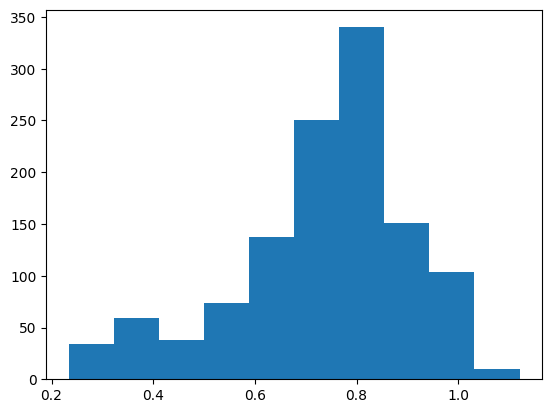

In [ ]:
# show actual productivity and its histogram
print(data['actual_productivity'])
plt.hist(data['actual_productivity'])

In [ ]:
# show department
data['department']

0           sweing
1       finishing 
2           sweing
3           sweing
4           sweing
           ...    
1192     finishing
1193     finishing
1194     finishing
1195     finishing
1196     finishing
Name: department, Length: 1197, dtype: object

In [ ]:
# fix department name
data['department'].replace('sweing', 'sewing', inplace=True)

In [ ]:
# show department again
data['department']

0           sewing
1       finishing 
2           sewing
3           sewing
4           sewing
           ...    
1192     finishing
1193     finishing
1194     finishing
1195     finishing
1196     finishing
Name: department, Length: 1197, dtype: object

In [ ]:
# count department
data['department'].value_counts()

sewing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [ ]:
# replace all NaN  in wip with numeric value 0
data.replace(np.nan,'0',inplace = True)

In [ ]:
# show wip
data['wip']

0       1108.0
1            0
2        968.0
3        968.0
4       1170.0
         ...  
1192         0
1193         0
1194         0
1195         0
1196         0
Name: wip, Length: 1197, dtype: object

TypeError: ignored

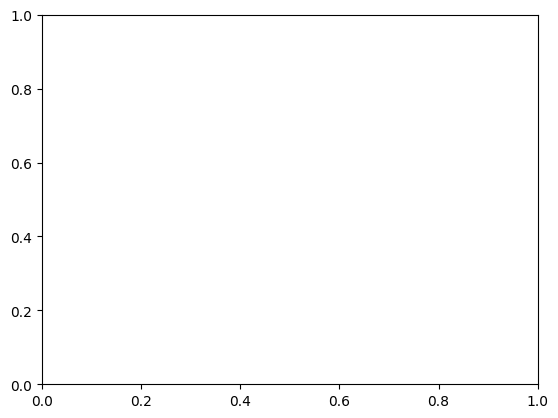

In [ ]:
plt.hist(data['wip'])

In [ ]:
# take a look of the date
data['date']

0        1/1/2015
1        1/1/2015
2        1/1/2015
3        1/1/2015
4        1/1/2015
          ...    
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, Length: 1197, dtype: object

In [ ]:
# convert date to datetime format
data['date'] = pd.to_datetime(data['date'])
print(data['date'])

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]


In [ ]:
#check quarter
print(data['quarter'])
print(data['quarter'].value_counts())


0       Quarter1
1       Quarter1
2       Quarter1
3       Quarter1
4       Quarter1
          ...   
1192    Quarter2
1193    Quarter2
1194    Quarter2
1195    Quarter2
1196    Quarter2
Name: quarter, Length: 1197, dtype: object
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64


In [25]:
# check team
#data['team']
data['team'] = data['team'].astype(str)
print(data['team'])
data['team'].value_counts()

0        8
1        1
2       11
3       12
4        6
        ..
1192    10
1193     8
1194     7
1195     9
1196     6
Name: team, Length: 1197, dtype: object


8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [29]:
# check day
data["day"]
data["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

<ipython-input-19-8da2950b8bca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

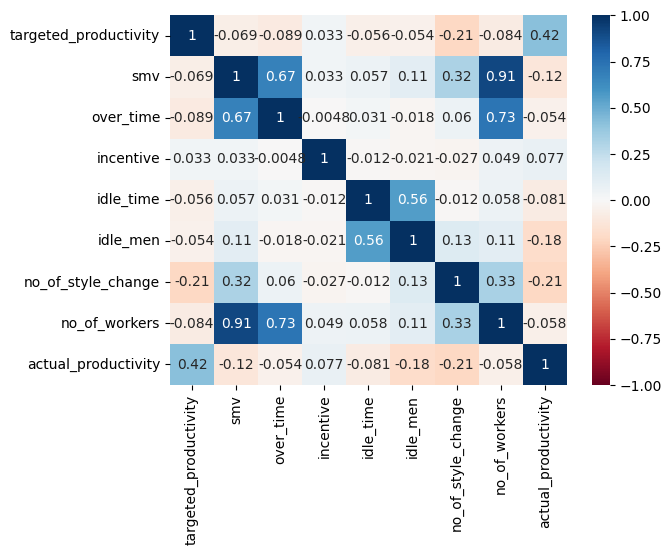

In [ ]:
# Visualising Data Correlations
corr = data.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
# one hot encoding four categorical values: department, day, quarter, team

d = data['department']
da = data['day']
q = data['quarter']
t =data['team']

def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])
    return onehot
d =(one_hot(d))
da =(one_hot(da))
q=(one_hot(q))
t=(one_hot(t))
print(d)
print(da)
print(q)
print(t)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   int64         
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   object        
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [36]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [38]:
#assign x and y

x = data.iloc[:,1-1].values
y = data.iloc[:,-1].values
print(x)
print(y)

['2015-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' ... '2015-03-11T00:00:00.000000000'
 '2015-03-11T00:00:00.000000000' '2015-03-11T00:00:00.000000000']
[0.94072542 0.8865     0.80057049 ... 0.625625   0.50588889 0.39472222]


In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test =train_test_split(x,y, test_size=0.2, random_state =0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(957, 14)
(240, 14)
(957,)
(240,)


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: ignored

In [ ]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
x_train = pca.fit_transform[x_train]

TypeError: ignored

In [ ]:
# Using Nueral network with no regularization

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(64,activation ='relu',input_shape=(train_X.shape[1],))) # input layer
model.add(layers.Dense(64,activation ='relu'))#hidden layer
model.add(layers.Dense(1, activation='sigmoid')) # output layer
model.compile(loss=losses.binary_crossentropy, optimizer='rmsprop', metrics=metrics.binary_accuracy)
model.fit(x_train,y_train,epochs=200, batch_size = 50)
result = model.evaluate(x_train,y_train)
result

In [ ]:
# USing logistic regression 
from sklearn.linear_model import LogisticRegression
classifier  = LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)

ValueError: ignored

In [ ]:
# THIS NEED TO BE COrrelation matrix???
# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
# Visualising the Training set results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()